In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import tensorflow as tf
import PIL

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/1240625276_fb3bd0c7b1.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4110787181_f73f12d107_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8174941335_56389b53e9_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7176736574_14446539cb_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/1064662314_c5a7891b9f_m.jpg')]

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/15901230359_1819e96b89_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4713531680_1110a2fa07_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14172324538_2147808483_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4256169180_55df2048a0.jpg')]

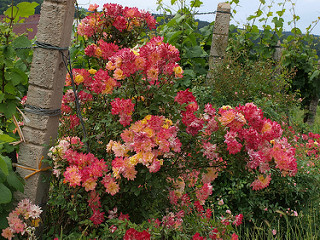

In [10]:
PIL.Image.open(str(roses[1]))

In [11]:
tulips = list(data_dir.glob('tulips/*'))

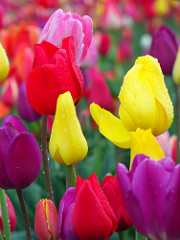

In [12]:
PIL.Image.open(str(tulips[0]))

## **Read flowers images from disk into numpy array using opencv**

In [13]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/15901230359_1819e96b89_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4713531680_1110a2fa07_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14172324538_2147808483_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4256169180_55df2048a0.jpg')]

In [16]:

str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/15901230359_1819e96b89_n.jpg'

In [17]:
import cv2

In [18]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [19]:
img.shape

(228, 320, 3)

In [20]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:

X, y = [], []

In [22]:
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [23]:
X = np.array(X)
y = np.array(y)


## **Train test split**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## **Preprocessing: scale images**

In [26]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## **Build convolutional neural network and train it**

---



In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [28]:
num_classes = 5

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, 3, padding='same', activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.3497 - loss: 1.5496
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.6197 - loss: 1.0067
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7087 - loss: 0.8092
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7599 - loss: 0.6698
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8444 - loss: 0.4481
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.8898 - loss: 0.3084
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9528 - loss: 0.1451
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9743 - loss: 0.0906
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9742 - loss: 0.0845
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9852 - loss: 0.0645
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.9961 - loss: 0.0184
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9

In [33]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - accuracy: 0.6544 - loss: 2.9258


[3.003291130065918, 0.6470588445663452]


**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (62.66%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [34]:
predictions = model.predict(X_test_scaled)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step


In [35]:
predictions

array([[1.5976738e-13, 9.9999994e-01, 2.9085347e-12, 1.7394249e-11,
        4.8271193e-10],
       [4.5990750e-05, 9.0557351e-17, 1.1224912e-23, 4.8070981e-10,
        9.9995393e-01],
       [5.1442988e-09, 1.8483878e-06, 9.9999803e-01, 2.1047079e-15,
        4.1677103e-10],
       ...,
       [1.6486723e-06, 1.2731329e-04, 4.0016882e-03, 9.8862493e-01,
        7.2444836e-03],
       [9.0831256e-01, 2.3043522e-13, 1.0426058e-15, 4.3241533e-22,
        9.1687419e-02],
       [3.6511196e-05, 1.8629431e-05, 4.0634794e-17, 2.2332873e-11,
        9.9994481e-01]], dtype=float32)

In [36]:
score = tf.nn.softmax(predictions[0])


In [37]:
np.argmax(score)

1

In [39]:
y_test[0]

1

## **Improve Test Accuracy Using Data Augmentation**

In [44]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

In [43]:
data_augmentation = Sequential()

In [46]:
data_augmentation.add(RandomFlip('horizontal', input_shape=(180, 180, 3)))
data_augmentation.add(RandomRotation(0.1))
data_augmentation.add(RandomZoom(0.1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


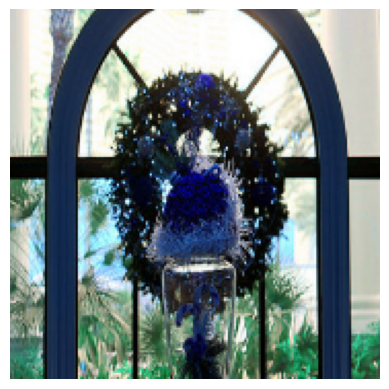

In [47]:
# Original Image
plt.axis('off')
plt.imshow(X[0])

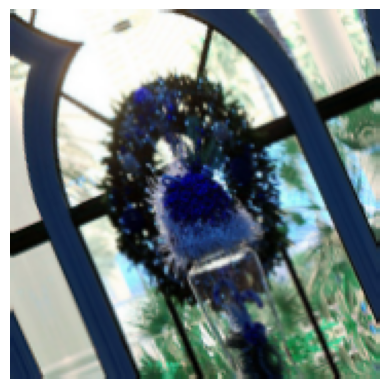

In [48]:
# Newly generated training sample using data augmentation
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

## **Train the model using data augmentation and a drop out layer**

In [51]:
from tensorflow.keras.layers import Dropout

In [49]:
num_classes = 5

In [50]:
model = Sequential()

In [52]:
model.add(Conv2D(16, 3, padding='same', activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes))

In [53]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.2985 - loss: 1.6283
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.5900 - loss: 1.0462
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6784 - loss: 0.8617
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7372 - loss: 0.7123
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8162 - loss: 0.5191
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.8868 - loss: 0.3397
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9302 - loss: 0.2246
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9706 - loss: 0.1272
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9738 - loss: 0.0882
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9875 - loss: 0.0531
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9889 - loss: 0.0515
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9

In [55]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 337ms/step - accuracy: 0.6506 - loss: 2.3602


[2.362698793411255, 0.6405228972434998]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 65.06%**